In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [5]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.3319]), tensor(0.8100)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 1.266111
Ошибка после 1 итераций: 0.520475
Ошибка после 2 итераций: 0.345876
Ошибка после 3 итераций: 0.274716
Ошибка после 4 итераций: 0.235148
Ошибка после 5 итераций: 0.210768
Ошибка после 6 итераций: 0.194712
Ошибка после 7 итераций: 0.182820
Ошибка после 8 итераций: 0.173853
Ошибка после 9 итераций: 0.168465
Ошибка после 10 итераций: 0.162785
Ошибка после 11 итераций: 0.158050
Ошибка после 12 итераций: 0.154117
Ошибка после 13 итераций: 0.150645
Ошибка после 14 итераций: 0.148729
Ошибка после 15 итераций: 0.146865
Ошибка после 16 итераций: 0.145333
Ошибка после 17 итераций: 0.143799
Ошибка после 18 итераций: 0.141203
Ошибка после 19 итераций: 0.140963


In [7]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_sc ale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

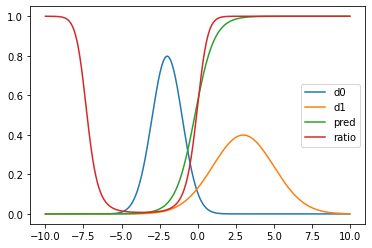

In [8]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.5742]), tensor(0.2743)]


In [11]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [12]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)

In [15]:
#двумерное распределение
mu00, sigma00, mu01, sigma01, = -2., 1., -2., 1.
mu10, sigma10,  mu11, sigma11 = 3., 2., 3., 2.

In [16]:
d00 = torch.distributions.Normal(torch.tensor([mu00, mu01]), torch.tensor([sigma00, sigma10]))
d11 = torch.distributions.Normal(torch.tensor([mu10, mu11]), torch.tensor([sigma10, sigma11]))

In [34]:
layer2 = nn.Linear(2, 1)
print([p.data for p in layer2.parameters()])
layer_opt2 = optim.SGD(lr=1e-3, params=list(layer2.parameters()))

[tensor([[ 0.2608, -0.6760]]), tensor([0.5220])]


In [35]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d00, d11, 100000)
            out = torch.sigmoid(layer2(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt2.zero_grad()
    x, y = sample(d00, d11, 1024)
    out = torch.sigmoid(layer2(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt2.step()

Ошибка после 0 итераций: 1.528645
Ошибка после 1 итераций: 0.320172
Ошибка после 2 итераций: 0.189480
Ошибка после 3 итераций: 0.146857
Ошибка после 4 итераций: 0.125347
Ошибка после 5 итераций: 0.112767
Ошибка после 6 итераций: 0.103853
Ошибка после 7 итераций: 0.096348
Ошибка после 8 итераций: 0.092734
Ошибка после 9 итераций: 0.088641
Ошибка после 10 итераций: 0.084773
Ошибка после 11 итераций: 0.082838
Ошибка после 12 итераций: 0.080049
Ошибка после 13 итераций: 0.078645
Ошибка после 14 итераций: 0.076488
Ошибка после 15 итераций: 0.073884
Ошибка после 16 итераций: 0.072779
Ошибка после 17 итераций: 0.072141
Ошибка после 18 итераций: 0.070949
Ошибка после 19 итераций: 0.070483


In [7]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
# # x_tensor = torch.tensor(x_sc ale.reshape(-1, 1), dtype=torch.float)
# # with torch.no_grad():
#     dist = torch.sigmoid(layer(x_tensor)).numpy()
# ratio = d1_pdf / (d1_pdf + d0_pdf)